# Overview

Networks (a.k.a. graphs) are widely used mathematical objects for representing and analysing social systems. 
This week is about getting familiar with networks, and we'll focus on four main aspects:

* Basic mathematical description of networks
* The `NetworkX` library.
* Building the network of GME redditors.
* Basic analysis of the network of GME redditors.

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. You will watch some videos made by Sune for his course _Social Graphs and Interactions_, where he covers networks in details.  

> **_Video Lecture_**. Start by watching the ["History of Networks"](https://youtu.be/qjM9yMarl70). 


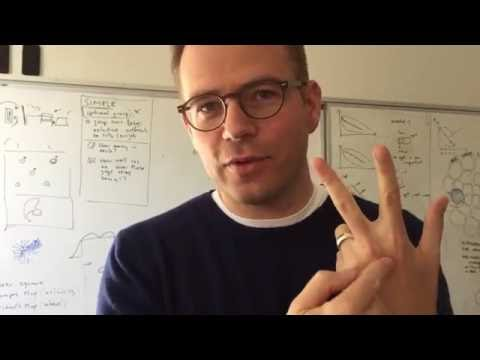

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("qjM9yMarl70",width=800, height=450)

> **_Video Lecture_**. Then check out a few comments on ["Network Notation"](https://youtu.be/MMziC5xktHs). 

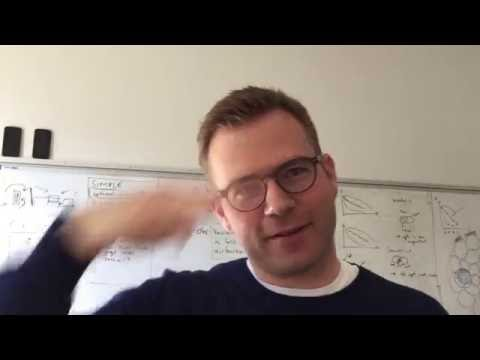

In [2]:
YouTubeVideo("MMziC5xktHs",width=800, height=450)

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://barabasi.com/networksciencebook/). 
> 
> * Read chapter 1\.
> * Read chapter 2\.
> 

> _Exercises_  
> _Chapter 1_ (Don't forget that you should be answering these in a Jupyter notebook.) 
> 
> * List three different real networks and state the nodes and links for each of them.
>      * 1: brain, neuros as node and axon as link
>      * 2: roads, node is when roads connect and link are the roads 
>      * 3: subjects, note is a subject fx physcics and links are if subjects are connected
>      * 4: emotion as node and behavior from an emotion as link?
>
> * Tell us of the network you are personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 
>       * the emotion/node behaviour from emotion/link, some say we have 27 emotions, yes mapped, might show something interesting
>
> * In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 
>    * society in general through fx social networking, because very large, predict terrorists, pandemics ofc, election, unlimited, behaviour in general
>
> _Chapter 2_
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
>     * spare is opposite of a dense network, epidemic spreading, idk, dense AI network might not be sparse? maximum connections
>
>  There are more questions on Chapter 2 below.
>     * ???

# Part 2: Exercises using the `NetworkX` library

We will analyse networks in Python using the [NetworkX](https://networkx.org/) library. The cool thing about networkx is that it includes a lot of algorithms and metrics for analysing networks, so you don't have to code things from scratch. Get started by running the magic ``pip install networkx`` command. Then, get familiar with the library through the following exercises: 

>  *Exercises*:

> * Go to the NetworkX project's [tutorial page](https://networkx.org/documentation/stable/tutorial.html). The goal of this exercise is to create your own notebook that contains the entire tutorial. You're free to add your own (e.g. shorter) comments in place of the ones in the official tutorial - and change the code to make it your own where ever it makes sense.
> * Go to Section 2.12: [Homework](http://networksciencebook.com/chapter/2#homework2), then
>     * Write the solution for exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
>     * Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4 ... but I'll be impressed if you do it).
>     * Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

In [ ]:
##### the 'Königsberg Problem'

# rule: either all are even or two are odd as Euler noticed

# therefore 
# A because two are odd and the rest even
# not B because more than two are odd
# C because all are even
# D because there are two with an odd degree

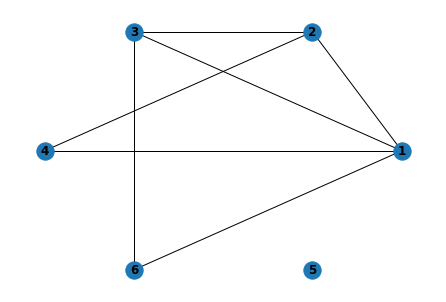

In [245]:
##### 'Graph representation'

#constructing a

import networkx as nx
import numpy as np
links = [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]
Ga = nx.Graph()
Ga.add_edges_from(links)
Ga.add_node(5)


nx.draw_circular(Ga, with_labels=True, font_weight='bold')

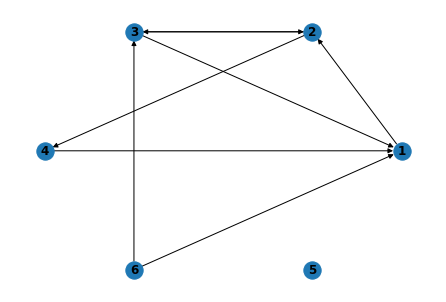

In [144]:
#constructing b

links = [(1, 2), (3, 1), (4, 1), (6, 1), (2, 3), (3, 2), (2, 4), (6, 3)]
DGb = nx.DiGraph()
DGb.add_edges_from(links)
DGb.add_node(5)


nx.draw_circular(DGb, with_labels=True, font_weight='bold')


In [146]:
# the structure matches
print(Ga)
print(DGb)

Graph with 6 nodes and 7 edges
DiGraph with 6 nodes and 8 edges


In [165]:
# adjacency matrices
node_list = [1, 2, 3, 4, 5, 6]
AGa = nx.adjacency_matrix(Ga, nodelist = node_list)
print(AGa.todense())
print('\n')
ADGb = nx.adjacency_matrix(DGb, nodelist = node_list)
print(ADGb.todense())


[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


In [190]:
# linked lists
# dont know if this is correct!! probably not
print(Ga.edges)
print('\nor\n')
print(list(nx.connected_components(Ga)))
print('\nor\n')
for node in Ga:
    print(node,Ga.edges(node))

[(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]

or

[{1, 2, 3, 4, 6}, {5}]

or

1 [(1, 2), (1, 3), (1, 4), (1, 6)]
2 [(2, 1), (2, 3), (2, 4)]
3 [(3, 1), (3, 2), (3, 6)]
4 [(4, 1), (4, 2)]
6 [(6, 1), (6, 3)]
5 []


In [161]:
# average clustering coefficient
print(nx.average_clustering(Ga))

0.6388888888888888


In [155]:
# switch the labels of nodes 5 and 6

# it is the same as swapping the corresponding rows and columns in the adjacency matrix



[1, 2, 3, 4, 6, 5]

In [ ]:
# What kind of information can you not infer from the link list representation 
#of the network that you can infer from the adjacency matrix?


# a linked list and not infer about a directed graph?


In [198]:
#In the (a) network, how many paths (with possible repetition of nodes and links) of 
#length 3 exist starting from node 1 and ending at node 3? And in (b)?
print('a')
for path in nx.all_simple_paths(Ga,source = 1, target = 3, cutoff = 3):
    print(path)

print('\nb')
for path in nx.all_simple_paths(DGb,source = 1, target = 3, cutoff = 3):
    print(path)

    
    

a
[1, 2, 3]
[1, 3]
[1, 4, 2, 3]
[1, 6, 3]

b
[1, 2, 3]


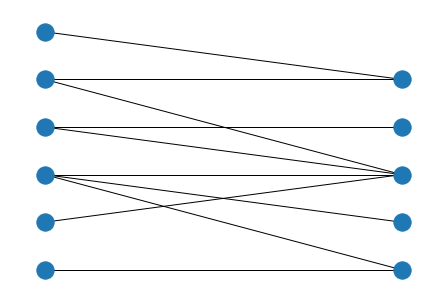

In [204]:
##### Bipartite Networks
import matplotlib.pyplot as plt
# constructing

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4, 5, 6], bipartite=0)
B.add_nodes_from([7, 8, 9, 10, 11], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, 7), (2, 9), (3, 7), (3, 8), (3, 9), (4, 9), (4, 10), (5, 9), (5, 11), (6, 11)])


X, Y = nx.bipartite.sets(B)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(B, pos=pos)
plt.show()

In [230]:
# Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.

adj = nx.algorithms.bipartite.biadjacency_matrix(B, row_order=[7, 8, 9, 10, 11], 
                                                 column_order = [1, 2, 3, 4, 5, 6] )


print(adj)

#prob not correct

  (0, 0)	1
  (0, 2)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (3, 3)	1
  (4, 4)	1
  (4, 5)	1


In [254]:
# Calculate the average degree of the purple nodes and the average 
#degree of the green nodes in the bipartite network.
print('both: ',np.array(list(dict(B.degree()).values())).mean())


both:  1.8181818181818181


In [255]:
#Calculate the average degree in each of the two network projections. 

print('purple: ',np.array(list(dict(B.degree([1, 2, 3, 4, 5, 6])).values())).mean())
print('green: ',np.array(list(dict(B.degree([7, 8, 9, 10, 11])).values())).mean())

#Is it surprising that the values are different from those obtained in point (c)?

# yes?


purple:  1.6666666666666667
green:  2.0


# Part 3: Building the GME redditors network

Ok, enough with theory :) It is time to go back to our cool dataset it took us so much pain to download! And guess what? We will build the network of GME Redditors. Then, we will use some Network Science to study some of its properties.


> 
> *Exercise*: Build the network of Redditors discussing about GME on r\wallstreetbets. In this network, nodes correspond to authors of comments, and a direct link going from node _A_ to node _B_ exists if _A_ ever answered a submission or a comment by _B_. The weight on the link corresponds to the number of times _A_ answered _B_. You can build the network as follows:
>
> 1. Open the _comments dataset_ and the _submission datasets_ (the first contains all the comments and the second cointains all the submissions) and store them in two Pandas DataFrames.
> 2. Create three dictionaries, using the command ``dict(zip(keys,values))``, where keys and values are columns in your dataframes. The three dictionaries are the following:
>     * __comment_authors__: (_comment id_, _comment author_)
>     * __parent__:  (_comment id_ , _parent id_)
>     * __submission_authors__: (_submission id_, _submission author_)
>
> where above I indicated the (key, value) tuples contained in each dictionary.
>
> 3. Create a function that take as input a _comment id_ and outputs the author of its parent. The function does two things:
>     * First, it calls the dictionary __parent__, to find the _parent id_ of the comment identified by a given _comment id_. 
>     * Then, it finds the author of  _parent id_. 
>          * if the _parent id_ starts with "t1_", call the __comment_authors__ dictionary (for key=parent_id[3:])
>          * if the _parent id_ starts with "t3_", call the __submission_authors__ dictionars (for key=parent_id[3:])
>
> where by parent_id[3:], I mean that the first three charachters of the _parent id_ (either "t1_" or "t3_" should be ingnored).
>
> 4. Apply the function you created in step 3. to all the comment ids in your comments dataframe. Store the output in a new column, _"parent author"_, of the comments dataframe. 
> 5. For now, we will focus on the genesis of the GME community on Reddit, before all the hype started and many new redditors jumped on board. For this reason, __filter all the comments written before Dec 31st, 2020__. Also, remove deleted users by filtering all comments whose author or parent author is equal to "[deleted]". 
> 6. Create the weighted edge-list of your network as follows: consider all comments (after applying the filtering step above), groupby ("_author_", _"parent author"_) and count. 
> 7. Create a [``DiGraph``](https://networkx.org/documentation/stable//reference/classes/digraph.html) using networkx. Then, use the networkx function [``add_weighted_edges_from``](https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.DiGraph.add_weighted_edges_from.html) to create a weighted, directed, graph starting from the edgelist you created in step 5.
> 8. Save the Network as a json file. 

In [17]:
# importing
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from statistics import mode
import json
from networkx.readwrite import json_graph




In [4]:


# 1

# open pickle as dataframe
path = '/Users/arond.jacobsen/Documents/GitHub/02467-ComSocSci/data'
df_submissions = pd.read_pickle(f"{path}{os.sep}reddit_submissions") 
df_comments = pd.read_pickle(f"{path}{os.sep}reddit_comments") 


In [5]:
# 1 version 2, because of different length?
path = '/Users/arond.jacobsen/Documents/GitHub/02467-ComSocSci/data'


#df_submissions = pd.read_csv(f"{path}{os.sep}WSBsubmissions.csv")

#df_comments = pd.read_csv(f"{path}{os.sep}WSBcomments.csv") # this one is wrong

In [6]:
print(df_submissions.shape)
df_submissions.head()

(14711, 8)


,title,id,score,date,author,num_comments,week,year
0,GME YOLO month-end update — Dec 2019,eick65,1,2020-01-01,DeepFuckingValue,52,1,2020
1,I got 500€ on DEGIRO where do you advice to YO...,ej0jf0,1,2020-01-02,CIARRAPUNGI,21,1,2020
2,GME. You know what to do,ekomox,1,2020-01-06,-deepwatervalue,0,2,2020
3,Gamestop and Ford. This is the way,emdmfg,1,2020-01-09,callmetmrw,7,2,2020
4,"GameStop 2019 Holiday sales down 27.5% YoY, co...",eoaua4,1,2020-01-13,WentBrokeDec2018,40,3,2020


In [7]:
print(df_comments.shape)
df_comments.head()

(636641, 8)


,id,submission_id,score,date,author,parent_id,comment,created_time
0,hqub8n7,t3_eick65,1,2022-01-01,[deleted],t1_fcr10e4,[removed],2022-01-01 19:50:31
1,hpdcbar,t3_eick65,1,2021-12-21,CutoffThought,t1_hmhijv0,Always come back to reminisce of the golden days,2021-12-21 01:42:30
2,hn8rsm7,t3_eick65,2,2021-12-04,NosikaOnline,t1_fcp6g5b,Damn,2021-12-04 21:36:21
3,hmhijv0,t3_eick65,1,2021-11-29,smash-smash-SUHMASH,t1_fcr10e4,i would love to know how that short worked out...,2021-11-29 03:13:30
4,hmf9x9l,t3_eick65,1,2021-11-28,[deleted],t1_fcspmtp,[removed],2021-11-28 17:48:46


In [8]:
#2


#comment_authors: (comment id, comment author)
#parent: (comment id , parent id)
#submission_authors: (submission id, submission author) 

comment_authors = dict(zip(df_comments['id'],df_comments['author']))

parent = dict(zip(df_comments['id'],df_comments['parent_id']))

submission_authors = dict(zip(df_submissions['id'],df_submissions['author']))

In [9]:
def find_parent(comid):
    parid = parent[comid] # parent id
    # identification of where it originated comment/submission
    if parid[:3] == 't1_': # the commentator is the author?
        par_aut = comment_authors[parid[3:]] # ignoring first three
    elif parid[:3] == 't3_':
        par_aut = submission_authors[parid[3:]]
        
    else:
        raise ValueError('No identification given, that being t1_ or t3_')

    #returns the parent of the comment by author name
    return par_aut

In [10]:
# when there is a mismatch
def find_parent_temp(comid):
    parid = parent[comid] # parent id
    # identification of where it originated comment/submission
    if parid[:3] == 't1_': # the commentator is the author?
        try:
            par_aut = comment_authors[parid[3:]] # ignoring first three
        except KeyError:
            par_aut = '[deleted]'
                
    elif parid[:3] == 't3_':
        par_aut = submission_authors[parid[3:]]
        
    else:
        raise ValueError('No identification given, that being t1_ or t3_')

    #returns the parent of the comment by author name
    return par_aut

In [11]:
#4

authors = [find_parent_temp(comid) for comid in df_comments['id']]


df_comments['parent_author'] = authors


In [12]:
# 5

# filtering out comments after 2020-12-31
df_comments = df_comments[df_comments['created_time']<'2020-12-31']


# filtering out deleted
df_comments = df_comments[(df_comments['author']!='[deleted]') & (df_comments['parent_author']!='[deleted]')]

In [13]:
df_comments.score.astype(int)

9         1
10        1
11        1
13        1
14        1
         ..
124131    1
124132    4
124133    2
124134    5
124135    6
Name: score, Length: 113384, dtype: int64

In [14]:
# 6
# weighted edge list as ((author, parent author), count)
# weighted, directed
# save as json file

#creating the edges
edges = df_comments[['author','parent_author','score']].to_records(index=False)
print(edges[0])


G = nx.DiGraph()
# adding the edges to the graph
G.add_weighted_edges_from(edges)


('DeepFuckingValue', 'satago', 1)


In [21]:
path = '/Users/arond.jacobsen/Documents/GitHub/02467-ComSocSci/personal_aron/3-week/reddit_network.json'

data = json_graph.node_link_data(G)

with open(path, 'w') as p:
    json.dump(data, p)
    
    

TypeError: Object of type int64 is not JSON serializable

In [370]:
# opening graph
G = nx.read_gml(path2)

NetworkXError: expected ']', found EOF at (105050, 1)

# Part 4: Preliminary analysis of the GME redditors network

We begin with a preliminary analysis of the network.

> 
> *Exercise: Basic Analysis of the Redditors Network*
> * Why do you think I want you guys to use a _directed_ graph? Could have we used an undirected graph instead?
> * What is the total number of nodes in the network? What is the total number of links? What is the density of the network (the total number of links over the maximum number of links)?
> * What are the average, median, mode, minimum and maximum value of the in-degree (number of incoming edges per redditor)? And of the out-degree (number of outgoing edges per redditor)? How do you intepret the results?
> * List the top 5 Redditors by in-degree and out-degree. What is their average score over time? At which point in time did they join the discussion on GME? When did they leave it?
> * Plot the distribution of in-degrees and out-degrees, using a logarithmic binning (see last week's exercise 4). 
> * Plot a scatter plot of the the in- versus out- degree for all redditors. Comment on the relation between the two.
> * Plot a scatter plot of the the in- degree versus average score for all redditors. Comment on the relation between the two.


In [371]:
from statistics import mode

# to see whether you receive comments or comment, yes?
print(G)
print('density: ', nx.density(G)) # low density, makes sende, large and independent
print('\n')
#degrees
print('in-degree mean: ', np.array(list(dict(G.in_degree()).values())).mean())
print('in-degree median: ', np.median(np.array(list(dict(G.in_degree()).values()))))
print('in-degree mode: ', mode(np.array(list(dict(G.in_degree()).values())))) # what appears the most
print('in-degree minimmum: ', np.array(list(dict(G.in_degree()).values())).min())
print('in-degree maximum: ', np.array(list(dict(G.in_degree()).values())).max())
print('\n')
print('out-degree mean: ', np.array(list(dict(G.out_degree()).values())).mean())
print('out-degree median: ', np.median(np.array(list(dict(G.out_degree()).values()))))
print('out-degree mode: ', mode(np.array(list(dict(G.out_degree()).values())))) # what appears the most
print('out-degree minimmum: ', np.array(list(dict(G.out_degree()).values())).min())
print('out-degree maximum: ', np.array(list(dict(G.out_degree()).values())).max())
# more maximum in, as submissions get in degress and have more


DiGraph with 26261 nodes and 95550 edges
density:  0.0001385557999080819


in-degree mean:  3.6384753055862307
in-degree median:  1.0
in-degree mode:  0
in-degree minimmum:  0
in-degree maximum:  2052


out-degree mean:  3.6384753055862307
out-degree median:  1.0
out-degree mode:  1
out-degree minimmum:  0
out-degree maximum:  801


In [385]:
# extracting it as list

in_arr = np.array(list(dict(G.in_degree()).values()))
out_arr = np.array(list(dict(G.out_degree()).values()))

# finding and sorting top 5
# in
top = 5
ind = np.argpartition(in_arr, -top)[-top:]
ind_sort = ind[np.argsort(in_arr[ind])]

#np.array(G.edges.data('weight'))[ind_sort.astype(int)]
top_tuple = [list(G.edges.data('weight'))[i] for i in ind_sort]
print('in top: ', top_tuple)
#average
average = [list(G.edges.data('weight'))[i] for i in ind_sort]
print('in-degree mean: ', np.array(list(dict(G.in_degree()).values())).mean())


print('in-degree mean: ', np.array(list(dict(G.in_degree()).values())).mean())


#### thought, did i understand score right?????

# out
top = 5
ind = np.argpartition(out_arr, -top)[-top:]
ind_sort = ind[np.argsort(out_arr[ind])]

#np.array(G.edges.data('weight'))[ind_sort.astype(int)]
top_tuple = [list(G.edges.data('weight'))[i] for i in ind_sort]
print('in top: ', top_tuple)



[('keynel12', 'joxXxor', 10), ('BasedBleach', 'Altruistic-Sense-593', 1), ('superanth', 'anthro28', 1), ('NeverOddOreveN69', 'Mildly-Rational', 1), ('DeepFuckingValue', 'satago', 1)]
